In [10]:
from Bio import SeqIO
from Bio.SeqIO.FastaIO import SimpleFastaParser
from io import StringIO
from gzip import open as gzopen
from Bio import SeqIO
import numpy as np
#import matplotlib.pyplot as plt
import os 
import pandas as pd

pd.options.display.max_columns = None
#pd.options.display.max_rows = None

# Step:1 Extract AMPs and Non AMPs


In [6]:

amp_DB_70_fasta = "../datasets/fasta/AMP.nr70.fasta"
amp_DB_80_fasta = "../datasets/fasta/AMP.nr80.fasta"
amp_DB_90_fasta = "../datasets/fasta/AMP.nr90.fasta"

amp_70_csv = "../datasets/newcluster/AMP.nr70.csv"
amp_80_csv = "../datasets/newcluster/AMP.nr80.csv"
amp_90_csv = "../datasets/newcluster/AMP.nr90.csv"

save_non_AMPs_path='/home/kongkitimanonk/SCRATCH_NOBAK/datasets/phase2/non_AMPs.csv'


## AMPs cluster 70 

In [49]:
sizes = [len(rec) for rec in SeqIO.parse(amp_DB_70_fasta, "fasta")]
len(sizes)

7580

In [41]:
lengths = map(len, SeqIO.parse(amp_DB_70_fasta, 'fasta'))
df = pd.Series([x for x in lengths], name="length").to_frame()

In [42]:
df.length.describe()

count    7580.000000
mean       60.546174
std       114.461391
min        11.000000
25%        18.000000
50%        30.000000
75%        66.000000
max      2337.000000
Name: length, dtype: float64

In [43]:
df

,length
0,2337
1,2319
2,2237
3,1619
4,1564
...,...
7575,11
7576,11
7577,11
7578,11


In [14]:
df_count=df.groupby('length').length.count().reset_index(name='count').sort_values(['count'], ascending=False)
#df_count.to_csv('df_count.csv', index=False)
_tmp_df_count =df_count
_tmp_df_count = _tmp_df_count.astype({"length": int}) 
_tmp_df_count

,length,count
9,20,514
4,15,375
2,13,369
1,12,345
7,18,270
...,...,...
269,320,1
270,321,1
271,322,1
272,323,1


In [20]:
_tmp_df_count[_tmp_df_count['length'] <= 100]

,length,count
9,20,514
4,15,375
2,13,369
1,12,345
7,18,270
...,...,...
70,81,25
47,58,24
79,90,24
88,99,20


write to csv file

In [53]:
AMPs_70_csv = open(amp_70_csv, 'w')
AMPs_70_csv.write('"ID","Sequence","length"'+ '\n')
count = 0
for record in SeqIO.parse(amp_DB_70_fasta, "fasta"):
    count = count + 1
    AMPs_70_csv.write('"'+str(record.id)+'","'+str(record.seq)+'","' + str(len(record.seq))+'"' + '\n')
print(count)
# with open(amp_DB_70_fasta) as amps_record:
#    for _name, _seq in  SimpleFastaParser(amps_record):
#        AMPs_70_csv.write('"'+_name+'","'+_seq+'","' + str(len(_seq))+'"' + '\n')
AMPs_70_csv.close()

7580


## AMPs cluster 80 

In [58]:
lengths = map(len, SeqIO.parse(amp_DB_80_fasta, 'fasta'))
df = pd.Series([x for x in lengths], name="length").to_frame()
df.length.describe()

count    9600.000000
mean       57.365000
std       107.811655
min        11.000000
25%        17.000000
50%        28.000000
75%        64.000000
max      2337.000000
Name: length, dtype: float64

In [59]:
df_count=df.groupby('length').length.count().reset_index(name='count').sort_values(['count'], ascending=False)
#df_count.to_csv('df_count.csv', index=False)
_tmp_df_count =df_count
_tmp_df_count = _tmp_df_count.astype({"length": int}) 
_tmp_df_count[_tmp_df_count['length'] <= 100]

,length,count
9,20,552
2,13,500
4,15,495
1,12,484
7,18,385
...,...,...
78,89,29
70,81,28
79,90,26
88,99,23


In [62]:
AMPs_80_csv = open(amp_80_csv, 'w')
AMPs_80_csv.write('"ID","Sequence","length"'+ '\n')
for record in SeqIO.parse(amp_DB_80_fasta, "fasta"):
    AMPs_80_csv.write('"'+str(record.id)+'","'+str(record.seq)+'","' + str(len(record.seq))+'"' + '\n')
AMPs_80_csv.close()


9600


## AMPs cluster 90 

In [66]:
lengths = map(len, SeqIO.parse(amp_DB_90_fasta, 'fasta'))
df = pd.Series([x for x in lengths], name="length").to_frame()
df.length.describe()

count    13131.000000
mean        52.737263
std         98.994318
min         11.000000
25%         17.000000
50%         26.000000
75%         58.500000
max       2337.000000
Name: length, dtype: float64

In [67]:
AMPs_90_csv = open(amp_90_csv, 'w')
AMPs_90_csv.write('"ID","Sequence","length"'+ '\n')
with open(amp_DB_90_fasta) as amps_record:
    for _name, _seq in  SimpleFastaParser(amps_record):
        AMPs_90_csv.write('"'+_name+'","'+_seq+'","' + str(len(_seq))+'"' + '\n')
    AMPs_90_csv.close()

## Non AMPs

Cut seq.length that beyond the 2350 to reduce the Uniref50 file size

In [ ]:
!seqkit --threads 20 -M 2350 /home/kongkitimanonk/SCRATCH_NOBAK/datasets/phase2/uniref50.fasta.gz > /home/kongkitimanonk/SCRATCH_NOBAK/datasets/phase2/uniref50.len2350.fasta

Start to extract exact lenght and amount of each seq.

In [10]:
NonAMPs_csv = open(non_AMPs_path, 'w')
NonAMPs_csv.write('"ID","Sequence","length"'+ '\n')
with open(uniref50) as record_len2400:
      for _name, _seq in  SimpleFastaParser(record_len2400):
           seqLen = len(_seq)
           #update value
           _tmp_row = _tmp_df_count.loc[ _tmp_df_count['length'] == seqLen]
           if not _tmp_row.empty and  _tmp_row['count'].values > 0:
               #print (str(_tmp_row['length']) +" "+ str(_tmp_row['count']))
               NonAMPs_csv.write('"'+_name+'","'_seq+'","'+ str(seqLen)+'"' + '\n')
               _tmp_df_count.at[ _tmp_row.index,'count']= _tmp_row['count'] - 1
           else:
               if _tmp_df_count['count'].values.sum() == 0:
                   print("stop")
                   break

        


stop


In [ ]:
## Split file 

def batch_iterator(iterator, batch_size):
    """Returns lists of length batch_size.

    This can be used on any iterator, for example to batch up
    SeqRecord objects from Bio.SeqIO.parse(...), or to batch
    Alignment objects from Bio.AlignIO.parse(...), or simply
    lines from a file handle.

    This is a generator function, and it returns lists of the
    entries from the supplied iterator.  Each list will have
    batch_size entries, although the final list may be shorter.
    """
    entry = True  # Make sure we loop once
    while entry:
        batch = []
        while len(batch) < batch_size:
            try:
                entry =  next(iterator)
            except StopIteration:
                entry = None
            if entry is None:
                # End of file
                break
            batch.append(entry)
        if batch:
            yield batch
"""
record_iter = SeqIO.parse(gzopen("uniref50.fasta.gz", "rt"), "fasta")
for i, batch in enumerate(batch_iterator(record_iter, 200000)):
    filename = "group_%i.fasta" % (i + 1)
    with open(filename, "w") as handle:
        count = SeqIO.write(batch, handle, "fasta")
    print("Wrote %i records to %s" % (count, filename))
"""            

#  Step:2 Data Cleaning

In [ ]:
!pip install ipympl
"""
conda install -y nodejs
pip install --upgrade jupyterlab
jupyter labextension install @jupyter-widgets/jupyterlab-manager
jupyter labextension install jupyter-matplotlib
jupyter nbextension enable --py widgetsnbextension
"""

In [31]:
import csv
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
#%matplotlib widget

Change and Run three times for different number of cluster 

In [156]:
non_AMPs_path='../datasets/non_AMPs.csv'

#NonAMPs_nr80_csv = open('../datasets/newcluster/NonAMPs.nr80.csv', 'w')
#NonAMPs_nr90_csv = open('../datasets/newcluster/NonAMPs.nr90.csv', 'w')
NonAMPs_nr70_csv = open('../datasets/newcluster/NonAMPs.nr70.csv', 'w')


In [157]:
#nonAMPs_df=pd.read_csv(non_AMPs_path,sep=',',header=0,quoting=csv.QUOTE_ALL)
nonAMPs_df=pd.read_csv(non_AMPs_path,sep=',',header=0)
AMPs_df=pd.read_csv(amp_70_csv,sep=',',header=0,quoting=csv.QUOTE_ALL)  #<---- changee this line amp_70_csv amp_80_csv

In [158]:
AMPs_df

,ID,Sequence,length
0,EN92515250|C|B3FJD7|phage,MAKKSVPLRKPAGSDGQGNIKVPGGPVVLDLGDFDDIFGPMESESP...,2337
1,EN54061055|C|F8SJ56|phage,MASKKTTLPKPKGINPQGSIVQLDLDDFDDLFDEDFGLPKKNSPYT...,2319
2,EN4815120|C|Q8SCY1|phage,MAKKVTLPKGQTGATGTTLGQAGNILDLSDVDDIFGDTPKAKKGSP...,2237
3,EN3016141|D|D2J8A7|bacteriocin,MAETIKGLRIDLSLKDMGVGRSITELKRSFRTLNSDLKVSSKNFEY...,1619
4,EN9175723|BD|Q93IM3|bacteriocin,MAKKKNTYKVPSIIALTLAGTALTTHHAQAADKTQDQSTNKNILND...,1564
...,...,...,...
7703,E12119|Tigerin-OL1|green cascade frog (Odorran...,ICIMIPISRCY,11
7704,L01A001285|Sequence 18 from patent US 6743769,KFKHYFFWKYK,11
7705,L01A001283|Sequence 20 from patent US 6743769,KWKWWWWWKWK,11
7706,L01A001366|Sequence 1 from patent US 6696559,YXXIQXWXHYR,11


In [159]:
nonAMPs_df

,ID,Sequence,length
0,UniRef50_A0A672ZWI7 Ig-like domain-containing ...,MVIHQRHTSDESFSSSPVEIRITAATPIPELAEERSAEKPPAVTET...,189
1,UniRef50_A0A3Q2PZR6 Uncharacterized protein n=...,MSTQAPTFTQPLQSVVALEGSAATFEAQVSGSPVPEVSWFRDGQVL...,295
2,UniRef50_V9IMB4 Titin n=21 Tax=Apis TaxID=7459...,MWMEVGRVNADTQKLNIRDLQENHMYLIRIFAKNEVGLSDPLESDE...,121
3,UniRef50_B4IRR3 GL21409 (Fragment) n=18 Tax=Dr...,IIHPLEDVSVTKGENAIFELELSKGDALVKWFKNGKELVFNDRVQL...,320
4,UniRef50_UPI00083D1E21 titin-like n=26 Tax=Apo...,HDFGIVILDILYCYEENSGVYECRAFNKYGEDTTKATLKCFSKASL...,65
...,...,...,...
21214,UniRef50_A0A151HEL5 Zinc finger C3HC4 type (R...,GLYFRPRRRASS,12
21215,UniRef50_K2MU79 Retrotransposon hot spot (RHS)...,MESNPMTLVGCG,12
21216,UniRef50_A0A1E1IUT2 Flagellar calcium-binding ...,IRCVGHWMQAEH,12
21217,UniRef50_A0A0S4ITT4 Dopa decarboxylase putati...,APWSASTLHCPG,12


## Cleaning

In [160]:
# remove white space
nonAMPs_df['ID'] = nonAMPs_df['ID'].str.strip()
nonAMPs_df['Sequence'] = nonAMPs_df['Sequence'].str.strip()
AMPs_df['ID'] = AMPs_df['ID'].str.strip()
AMPs_df['Sequence'] = AMPs_df['Sequence'].str.strip()


In [161]:
AMPs_df['Sequence'] = AMPs_df['Sequence'].str.upper()
nonAMPs_df['Sequence'] = nonAMPs_df['Sequence'].str.upper()

In [162]:
## Deduplicate 
query_list = AMPs_df["Sequence"]
nonAMPs_df.drop(nonAMPs_df[nonAMPs_df['Sequence'].isin(query_list)].index , inplace = True)

In [163]:
nonAMPs_df

,ID,Sequence,length
0,UniRef50_A0A672ZWI7 Ig-like domain-containing ...,MVIHQRHTSDESFSSSPVEIRITAATPIPELAEERSAEKPPAVTET...,189
1,UniRef50_A0A3Q2PZR6 Uncharacterized protein n=...,MSTQAPTFTQPLQSVVALEGSAATFEAQVSGSPVPEVSWFRDGQVL...,295
2,UniRef50_V9IMB4 Titin n=21 Tax=Apis TaxID=7459...,MWMEVGRVNADTQKLNIRDLQENHMYLIRIFAKNEVGLSDPLESDE...,121
3,UniRef50_B4IRR3 GL21409 (Fragment) n=18 Tax=Dr...,IIHPLEDVSVTKGENAIFELELSKGDALVKWFKNGKELVFNDRVQL...,320
4,UniRef50_UPI00083D1E21 titin-like n=26 Tax=Apo...,HDFGIVILDILYCYEENSGVYECRAFNKYGEDTTKATLKCFSKASL...,65
...,...,...,...
21214,UniRef50_A0A151HEL5 Zinc finger C3HC4 type (R...,GLYFRPRRRASS,12
21215,UniRef50_K2MU79 Retrotransposon hot spot (RHS)...,MESNPMTLVGCG,12
21216,UniRef50_A0A1E1IUT2 Flagellar calcium-binding ...,IRCVGHWMQAEH,12
21217,UniRef50_A0A0S4ITT4 Dopa decarboxylase putati...,APWSASTLHCPG,12


## Data Balancing

AMP count

In [164]:
df_count=AMPs_df.groupby('length').length.count().reset_index(name='count').sort_values(['count'], ascending=False)
#df_count.to_csv('df_count.csv', index=False)
_tmp_df_count =df_count
_tmp_df_count = _tmp_df_count.astype({"length": int}) 
_tmp_df_count

,length,count
9,20,514
4,15,375
2,13,369
1,12,345
0,11,302
...,...,...
269,320,1
270,321,1
271,322,1
272,323,1


Non-AMP  count

In [165]:
nonAMPs_df_count=nonAMPs_df.groupby('length').length.count().reset_index(name='count').sort_values(['count'], ascending=False)
#df_count.to_csv('df_count.csv', index=False)
_tmp_nonAMPs_df_count = nonAMPs_df_count
_tmp_nonAMPs_df_count = _tmp_nonAMPs_df_count.astype({"length": int}) 
_tmp_nonAMPs_df_count

,length,count
9,20,1107
2,13,1093
1,12,894
7,18,861
4,15,830
...,...,...
392,448,1
394,455,1
396,460,1
397,461,1


In [166]:
NonAMPs_nr70_csv.write('"ID","Sequence","length"'+ '\n')
for index, row in _tmp_df_count.iterrows():
    #print(row['length'], row['count'])
    count = row['count']
    seqLen = row['length']
    for index, rowNonAMP in nonAMPs_df.iterrows():
        if rowNonAMP['length'] == seqLen:
            if  count > 0:
                #print (str(rowNonAMP['length']) +" "+ str(rowNonAMP['ID']))
                NonAMPs_nr70_csv.write('"'+rowNonAMP['ID']+'","'+rowNonAMP['Sequence']+'","'+str(rowNonAMP['length'])+'"' + '\n') #<---- changee this line NonAMPs_nr70_csv NonAMPs_nr80_csv
                count = count - 1
            else:
                if count == 0:
                    #print("stop")
                    break
NonAMPs_nr70_csv.close() #<---- changee this line NonAMPs_nr70_csv NonAMPs_nr80_csv
print("complete")

complete


## Similarity check of Distribution

In [136]:
nonAMPs_df.length.describe()

count    20826.000000
mean        61.310765
std        115.638308
min         11.000000
25%         18.000000
50%         29.000000
75%         62.000000
max       2337.000000
Name: length, dtype: float64

In [137]:
AMPs_df.length.describe()

count    13131.000000
mean        52.737263
std         98.994318
min         11.000000
25%         17.000000
50%         26.000000
75%         58.500000
max       2337.000000
Name: length, dtype: float64

Note: it should have same amount but I didn't know why there are 7 missing peptides from nonAMPs file, however, the describe() function show the same statistics

In [46]:
def lengthDistribution(df,title):
    fig = plt.figure()
    ax = fig.gca()
    pd.Series(df['length']).hist(color='blue', bins=200, ax=ax)
    plt.ylabel('Num of Seq with this length ')
    plt.xlabel('Length of Seq')
    plt.title(title)

def plotCharDistribution(dict_counts, char_totalsize, title):
    fig = plt.figure()
    fig.suptitle(title, fontsize=20)
    ax = fig.add_subplot(111)
    # The bar chart, with letters along the horizontal axis and the calculated
    # letter frequencies as percentages as the bar height
    x = range(len(dict_counts))
    letters =  dict_counts.keys()
    ax.bar(x, [val / char_totalsize * 100 for key,val in dict_counts.items()], width=0.8,
        color='g', alpha=0.5, align='center')
    ax.set_xticks(x)
    ax.set_xticklabels(letters)
    ax.tick_params(axis='x', direction='out')
    ax.set_xlim(-0.5, 25.5)
    ax.yaxis.grid(True)
    ax.set_ylabel('Letter frequency, %')

def countProtien(df, title):
    # count Sequence 
    records = df['Sequence']
    print("Count Records:", len(records))
    # countAminoAcids
    counts = Counter()
    for index, row in df.iterrows():
        line= row['Sequence']
        counts.update(line.rstrip())
        total = float(sum(counts.values()))
    sorted_dict = {key: value for key, value in sorted(counts.items())}
    for key,val in sorted_dict.items():
        print("{}: {}, ({:.2%})".format(key,val, val / total))

    plotCharDistribution(sorted_dict, total, title)

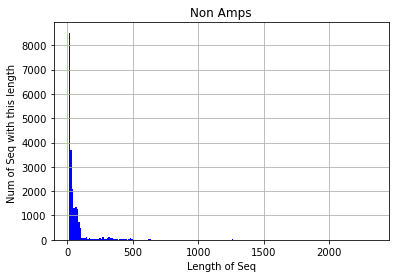

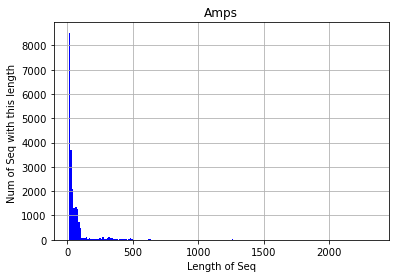

In [39]:
lengthDistribution(nonAMPs_df,"Non Amps")
lengthDistribution(AMPs_df,"Amps")

Count Records: 21219
A: 97362, (7.58%)
B: 12, (0.00%)
C: 24278, (1.89%)
D: 68125, (5.31%)
E: 80075, (6.24%)
F: 47225, (3.68%)
G: 87545, (6.82%)
H: 29592, (2.30%)
I: 66630, (5.19%)
K: 74760, (5.82%)
L: 117285, (9.13%)
M: 37433, (2.92%)
N: 55711, (4.34%)
P: 62916, (4.90%)
Q: 52002, (4.05%)
R: 72586, (5.65%)
S: 99760, (7.77%)
T: 76856, (5.99%)
V: 80965, (6.31%)
W: 15424, (1.20%)
X: 819, (0.06%)
Y: 36664, (2.86%)
Z: 6, (0.00%)


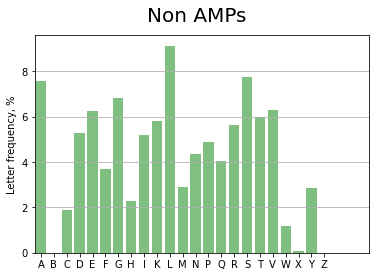

In [50]:
countProtien(nonAMPs_df,"Non AMPs")


Count Records: 21226
A: 98654, (7.68%)
B: 20, (0.00%)
C: 44171, (3.44%)
D: 52677, (4.10%)
E: 57690, (4.49%)
F: 48055, (3.74%)
G: 109341, (8.51%)
H: 24361, (1.90%)
I: 69185, (5.39%)
J: 73, (0.01%)
K: 112602, (8.77%)
L: 104187, (8.11%)
M: 22701, (1.77%)
N: 63546, (4.95%)
O: 105, (0.01%)
P: 54034, (4.21%)
Q: 45787, (3.57%)
R: 72116, (5.62%)
S: 80188, (6.24%)
T: 69394, (5.40%)
U: 6, (0.00%)
V: 78687, (6.13%)
W: 25760, (2.01%)
X: 3269, (0.25%)
Y: 47457, (3.70%)
Z: 42, (0.00%)


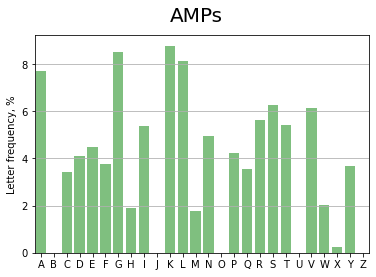

In [51]:
countProtien(AMPs_df,"AMPs")

## Step3: Labeling

In [138]:
save_AMPsNonAMPs_nr70_path='../datasets/newcluster/AMPs_NonAMPs.ready.nr70.csv'
save_AMPsNonAMPs_nr80_path='../datasets/newcluster/AMPs_NonAMPs.ready.nr80.csv'
save_AMPsNonAMPs_nr90_path='../datasets/newcluster/AMPs_NonAMPs.ready.nr90.csv'

In [173]:
nonAMPs_df=pd.read_csv('../datasets/newcluster/NonAMPs.nr90.csv',sep=',',header=0,quoting=csv.QUOTE_ALL) #<---- changee this line NonAMPs_nr80_csv NonAMPs_nr90_csv
AMPs_df=pd.read_csv(amp_90_csv,sep=',',header=0,quoting=csv.QUOTE_ALL)  #<---- changee this line amp_70_csv amp_80_csv

In [174]:
# setup
nonAMPs_df['class']=1
AMPs_df['class']=0

In [175]:
AMPs_df

,ID,Sequence,length,class
0,EN92515250|C|B3FJD7|phage 201phi2-1 lysin,MAKKSVPLRKPAGSDGQGNIKVPGGPVVLDLGDFDDIFGPMESESP...,2337,0
1,EN54061055|C|F8SJ56|phage PhiPA3 lysin,MASKKTTLPKPKGINPQGSIVQLDLDDFDDLFDEDFGLPKKNSPYT...,2319,0
2,EN4815120|C|Q8SCY1|phage phiKZ lysin,MAKKVTLPKGQTGATGTTLGQAGNILDLSDVDDIFGDTPKAKKGSP...,2237,0
3,EN3016141|D|D2J8A7|bacteriocin,MAETIKGLRIDLSLKDMGVGRSITELKRSFRTLNSDLKVSSKNFEY...,1619,0
4,EN9175723|BD|Q93IM3|bacteriocin,MAKKKNTYKVPSIIALTLAGTALTTHHAQAADKTQDQSTNKNILND...,1564,0
...,...,...,...,...
13126,LFB0115|milkampdb,RRWQRWMKKLG,11,0
13127,LFH0081|milkampdb,RWAWRLMRKVR,11,0
13128,2529_peptideDB.anti|peptideDB.anti,SLAGVISGAKK,11,0
13129,1178_pos_train_ds3|pos_train_ds3,SFINVNCWCET,11,0


In [176]:
nonAMPs_df

,ID,Sequence,length,class
0,UniRef50_A0A410SEU7 Truncated nuclear receptor...,TELTFNYNLECLGNGKTVCK,20,1
1,UniRef50_A7KZR0 CARD15 (Fragment) n=3 Tax=Simi...,FQCFFAAFYLALSADVPPAL,20,1
2,UniRef50_P81070 Fibrinogen (Fragment) n=3 Tax=...,LHSNLEYQYRYSGRVASGIP,20,1
3,UniRef50_A0A5K1GBG1 Uncharacterized protein (F...,LNPVYVSGSFYQRATRCNSN,20,1
4,UniRef50_A0A1M4ZPR7 Uncharacterized protein n=...,MAVNTWVGNSYVGADGRWIR,20,1
...,...,...,...,...
13126,UniRef50_A0A323TJX8 VWFD domain-containing pro...,SYLLAKDFVGGDFEVIGEYESVGGLMRLKSVVVRGQGTDVTLHVDG...,380,1
13127,UniRef50_C6WJT6 Response regulator receiver pr...,MSNRRVLMVDDEQRVLDGLRRMLRGRYELTTSVSGAEAIGLVREST...,382,1
13128,UniRef50_A0A1A8A8S0 EH domain binding protein ...,MTSVWKRLQRVGKKASKFQFVASFEELILESCKKWQPDKLRVMWIR...,210,1
13129,UniRef50_F6TRT4 SYCP2_ARLD domain-containing p...,MGTNEKQLENLLRGSDSNKIEEFLQSNLNTPQACGTVFESCLRRVA...,384,1


In [177]:
ready_df = pd.concat([AMPs_df,nonAMPs_df], axis=0)
ready_df

,ID,Sequence,length,class
0,EN92515250|C|B3FJD7|phage 201phi2-1 lysin,MAKKSVPLRKPAGSDGQGNIKVPGGPVVLDLGDFDDIFGPMESESP...,2337,0
1,EN54061055|C|F8SJ56|phage PhiPA3 lysin,MASKKTTLPKPKGINPQGSIVQLDLDDFDDLFDEDFGLPKKNSPYT...,2319,0
2,EN4815120|C|Q8SCY1|phage phiKZ lysin,MAKKVTLPKGQTGATGTTLGQAGNILDLSDVDDIFGDTPKAKKGSP...,2237,0
3,EN3016141|D|D2J8A7|bacteriocin,MAETIKGLRIDLSLKDMGVGRSITELKRSFRTLNSDLKVSSKNFEY...,1619,0
4,EN9175723|BD|Q93IM3|bacteriocin,MAKKKNTYKVPSIIALTLAGTALTTHHAQAADKTQDQSTNKNILND...,1564,0
...,...,...,...,...
13126,UniRef50_A0A323TJX8 VWFD domain-containing pro...,SYLLAKDFVGGDFEVIGEYESVGGLMRLKSVVVRGQGTDVTLHVDG...,380,1
13127,UniRef50_C6WJT6 Response regulator receiver pr...,MSNRRVLMVDDEQRVLDGLRRMLRGRYELTTSVSGAEAIGLVREST...,382,1
13128,UniRef50_A0A1A8A8S0 EH domain binding protein ...,MTSVWKRLQRVGKKASKFQFVASFEELILESCKKWQPDKLRVMWIR...,210,1
13129,UniRef50_F6TRT4 SYCP2_ARLD domain-containing p...,MGTNEKQLENLLRGSDSNKIEEFLQSNLNTPQACGTVFESCLRRVA...,384,1


In [178]:
ready_df.to_csv(save_AMPsNonAMPs_nr90_path,sep=",", quotechar='"',index=False, quoting=csv.QUOTE_ALL)

## To FASTA

In [4]:
df = pd.read_csv("AMPS_NonAMPs.ready.csv", header=0, encoding="utf-8", usecols=['ID', 'Sequence'])
with open("AMPS_NonAMPs.ready.fasta", 'w') as file:
    for index, row in df.iterrows():
        header = row['ID']
        seq = row['Sequence']
        # print(header)
        file.write('>'+ header + '\n')
        file.write(seq + '\n')
        
print("--- End of Writing ----")

--- End of Writing ----


In [28]:
#df = pd.read_csv("AMPS_NonAMPs.ready.csv", header=0, encoding="utf-8", usecols=['ID', 'Sequence','class'])
df= df[df['class']==1]

with open("NonAMPs.ready.fasta", 'w') as file:
    for index, row in df.iterrows():
        header = row['ID']
        seq = row['Sequence']
        # print(header)
        file.write('>'+ header + '\n')
        file.write(seq + '\n')
           
print("--- End of Writing ----")

--- End of Writing ----


In [15]:
search_values = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y','X']
not_search_values = ['B','J','O','U','Z']

In [16]:
key = '|'.join(not_search_values )
key

'B|J|O|U|Z'

In [26]:
df[df['Sequence'].str.contains(key)]

,ID,Sequence,class
34703,UniRef50_Q9UWI9 5 kDa flagellin (Fragment) n=1...,PALTNBILVPTEKVKVTLXPSD,1
35342,UniRef50_P21985 Flagellar filament 33 kDa core...,MIINHNMSAINAQXVQGBVT,1
35420,UniRef50_P20677 Serum amyloid P-component (Fra...,ZPIDLMGKVFVFDKELSPBI,1
36375,UniRef50_Q7M546 Ribosomal protein S2 (Fragment...,SENESDTESZLLZNSPPGE,1
36795,UniRef50_P01206 Melanotropin beta n=1 Tax=Scyl...,BZIBYKMGHFRWGAPMDK,1
39192,UniRef50_P14474 Fibrinogen beta chain (Fragmen...,QGVBGBEEGLFGGR,1
39793,UniRef50_P42717 Waspkinin n=1 Tax=Parapolybia ...,QZKRPPGFSPFRK,1
39828,UniRef50_P14472 Fibrinogen beta chain (Fragmen...,QGVBBBZGLFSAR,1
40894,UniRef50_P25072 Phospholipase A2 1 (Fragment) ...,SLLBFKBMIEST,1


In [27]:
df = df[~df['Sequence'].str.contains(key)]